# İmporting Libraries

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Loading Dataset

In [2]:
diabetes = pd.read_csv("diabetes_dataset00.csv")
df = diabetes.copy()
df.head()

Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...                  60   
2              High      Unhealthy  ...                  80   
3               Low      Unhealthy  ...                  89   
4              High        Healthy  ...                  41   

   Cystic Fibrosis Diagnosis  Steroid Use History  Genetic Testing  \
0                         No                   No         Positive   
1                        Yes                   No         Negative   
2                        Yes                   No         Negative   
3                        Yes                   No         Positive   
4                         No                   No         Positive   

  Neurological Assessments Liver Function Tests Digestive Enzyme Levels  \
0                        3               Normal                      56   
1                        1               Normal                      28   
2                        1             Abnormal                      55   
3                        2             Abnormal                      60   
4                        1               Normal                      24   

        Urine Test Birth Weight Early Onset Symptoms  
0  Ketones Present         2629                   No  
1  Glucose Present         1881                  Yes  
2  Ketones Present         3622                  Yes  
3  Ketones Present         3542                   No  
4  Protein Present         1770                   No  

[5 rows x 34 columns]

# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [4]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'Target': array(['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)',
        'Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA',
        'Type 2 Diabetes', 'Wolcott-Rallison Syndrome',
        'Secondary Diabetes', 'Type 3c Diabetes (Pancreatogenic Diabetes)',
        'Gestational Diabetes', 'Cystic Fibrosis-Related Diabetes (CFRD)',
        'MODY'], dtype=object),
 'Genetic Markers': array(['Positive', 'Negative'], dtype=object),
 'Autoantibodies': array(['Negative', 'Positive'], dtype=object),
 'Family History': array(['No', 'Yes'], dtype=object),
 'Environmental Factors': array(['Present', 'Absent'], dtype=object),
 'Insulin Levels': array([40, 13, 27,  8, 17, 29, 10, 47, 21, 16, 22,  9, 38, 14, 12, 30, 19,
        42, 34, 11, 24, 44, 20, 15, 18,  6, 28, 48,  5, 46, 26, 45, 33, 23,
        41, 39,  7, 31, 35, 25, 32, 36, 43, 49, 37], dtype=int64),
 'Age': array([44,  1, 36,  7, 10, 41, 30,  3, 47, 72, 67, 29, 59,  0, 45, 53, 60,
        16, 35, 14, 64,  9, 65,

In [5]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values for the column {col} :")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Unique values for the column Target :
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: Target, dtype: int64

--------------------------------------------------

Unique values for the column Genetic Markers :
Positive    35101
Negative    34899
Name: Genetic Markers, dtype: int64

--------------------------------------------------

Unique values for the column Autoantibodies :
N

* The graph below shows that the dataset is quite balanced.

<AxesSubplot: >

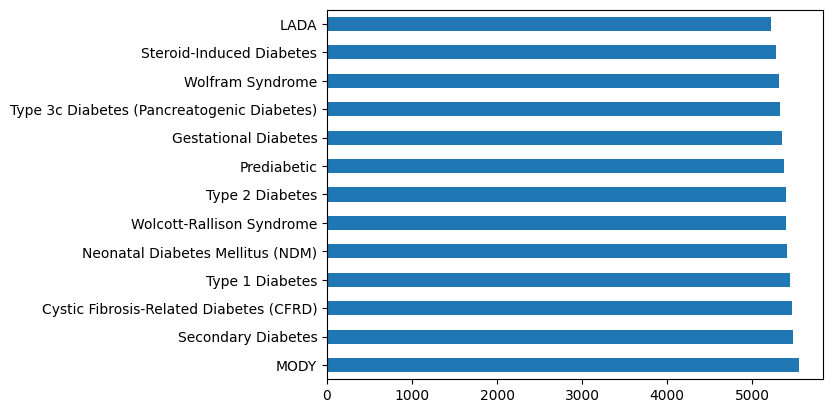

In [6]:
df["Target"].value_counts().plot.barh()

In [7]:
df.describe().T

count         mean         std     min  \
Insulin Levels                70000.0    21.607443   10.785852     5.0   
Age                           70000.0    32.020700   21.043173     0.0   
BMI                           70000.0    24.782943    6.014236    12.0   
Blood Pressure                70000.0   111.339543   19.945000    60.0   
Cholesterol Levels            70000.0   194.867200   44.532466   100.0   
Waist Circumference           70000.0    35.051657    6.803461    20.0   
Blood Glucose Levels          70000.0   160.701657   48.165547    80.0   
Weight Gain During Pregnancy  70000.0    15.496414    9.633096     0.0   
Pancreatic Health             70000.0    47.564243   19.984683    10.0   
Pulmonary Function            70000.0    70.264671   11.965600    30.0   
Neurological Assessments      70000.0     1.804157    0.680154     1.0   
Digestive Enzyme Levels       70000.0    46.420529   19.391089    10.0   
Birth Weight                  70000.0  3097.061071  713.837300  1500.0   

                                 25%     50%      75%     max  
Insulin Levels                  13.0    19.0    28.00    49.0  
Age                             14.0    31.0    49.00    79.0  
BMI                             20.0    25.0    29.00    39.0  
Blood Pressure                  99.0   113.0   125.00   149.0  
Cholesterol Levels             163.0   191.0   225.00   299.0  
Waist Circumference             30.0    34.0    39.00    54.0  
Blood Glucose Levels           121.0   152.0   194.00   299.0  
Weight Gain During Pregnancy     7.0    16.0    22.00    39.0  
Pancreatic Health               32.0    46.0    64.00    99.0  
Pulmonary Function              63.0    72.0    79.00    89.0  
Neurological Assessments         1.0     2.0     2.00     3.0  
Digestive Enzyme Levels         31.0    48.0    61.00    99.0  
Birth Weight                  2629.0  3103.0  3656.25  4499.0

* Boxplot graphs are effective tools for outlier detection as they visually represent the data distribution and highlight potential outliers using the Interquartile Range (IQR) method. The figure below illustrates the IQR of the numerical features, and it can be 
observed from the graph that the numerical features do not require additional outlier handling. 

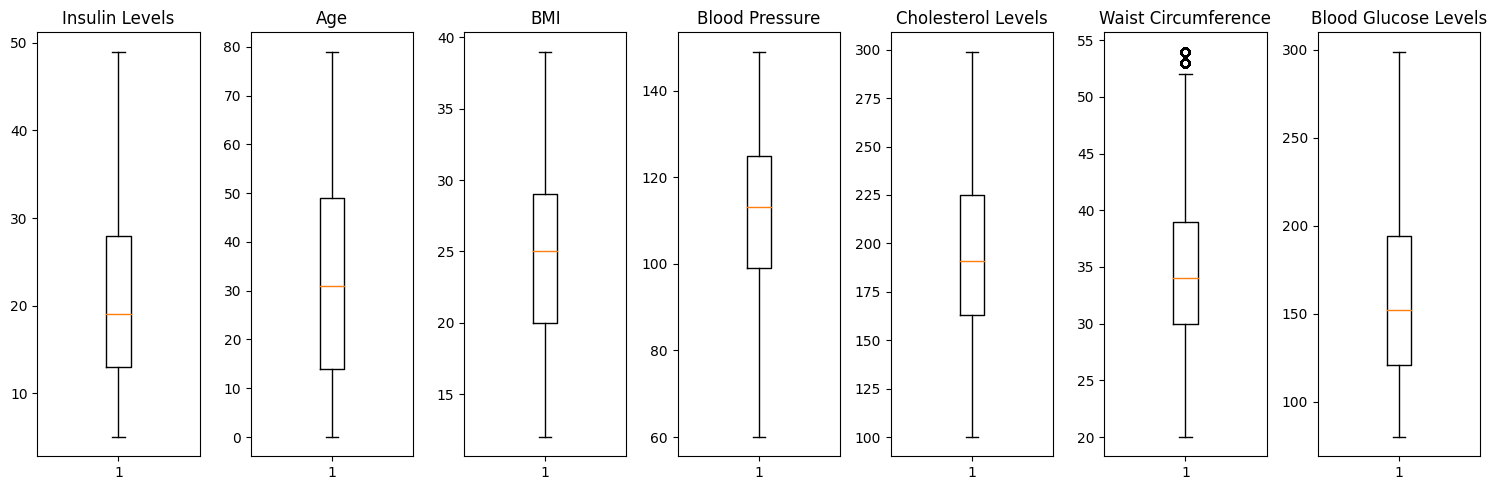

In [8]:
# Creates subplots
fig, axs = plt.subplots(1, 7, figsize=(15, 5))
# Plots Boxplot for Data 1
axs[0].boxplot(df["Insulin Levels"])
axs[0].set_title('Insulin Levels')

# Plots Boxplot for Data 2
axs[1].boxplot(df["Age"])
axs[1].set_title('Age')

# Plots Boxplot for Data 3
axs[2].boxplot(df["BMI"])
axs[2].set_title('BMI')

# Plots Boxplot for Data 4
axs[3].boxplot(df["Blood Pressure"])
axs[3].set_title('Blood Pressure')

# Plots Boxplot for Data 5
axs[4].boxplot(df["Cholesterol Levels"])
axs[4].set_title('Cholesterol Levels')

# Plots Boxplot for Data 6
axs[5].boxplot(df["Waist Circumference"])
axs[5].set_title('Waist Circumference')

# Plots Boxplot for Data 7
axs[6].boxplot(df["Blood Glucose Levels"])
axs[6].set_title('Blood Glucose Levels')

# Adjusts layout
plt.tight_layout()
plt.show()

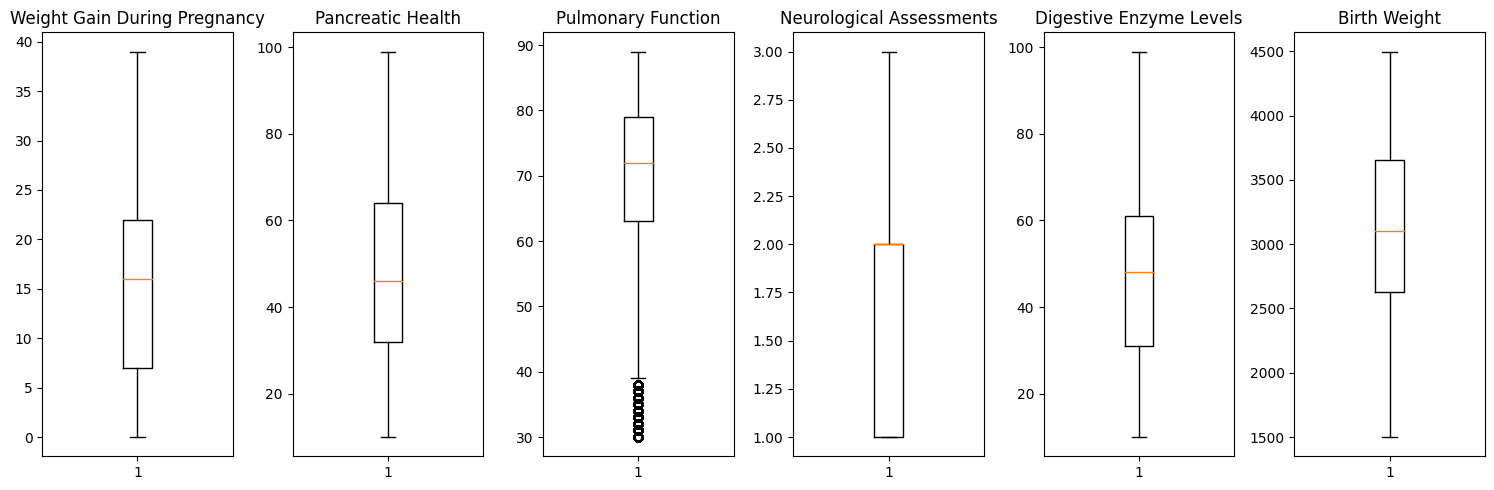

In [9]:
# Creates subplots
fig, axs = plt.subplots(1, 6, figsize=(15, 5))
# Plots Boxplot for Data 1
axs[0].boxplot(df["Weight Gain During Pregnancy"])
axs[0].set_title('Weight Gain During Pregnancy')

# Plots Boxplot for Data 2
axs[1].boxplot(df["Pancreatic Health"])
axs[1].set_title('Pancreatic Health')

# Plots Boxplot for Data 3
axs[2].boxplot(df["Pulmonary Function"])
axs[2].set_title('Pulmonary Function')

# Plots Boxplot for Data 4
axs[3].boxplot(df["Neurological Assessments"])
axs[3].set_title('Neurological Assessments')

# Plots Boxplot for Data 5
axs[4].boxplot(df["Digestive Enzyme Levels"])
axs[4].set_title('Digestive Enzyme Levels')

# Plots Boxplot for Data 6
axs[5].boxplot(df["Birth Weight"])
axs[5].set_title('Birth Weight')

# Adjusts layout
plt.tight_layout()
plt.show()

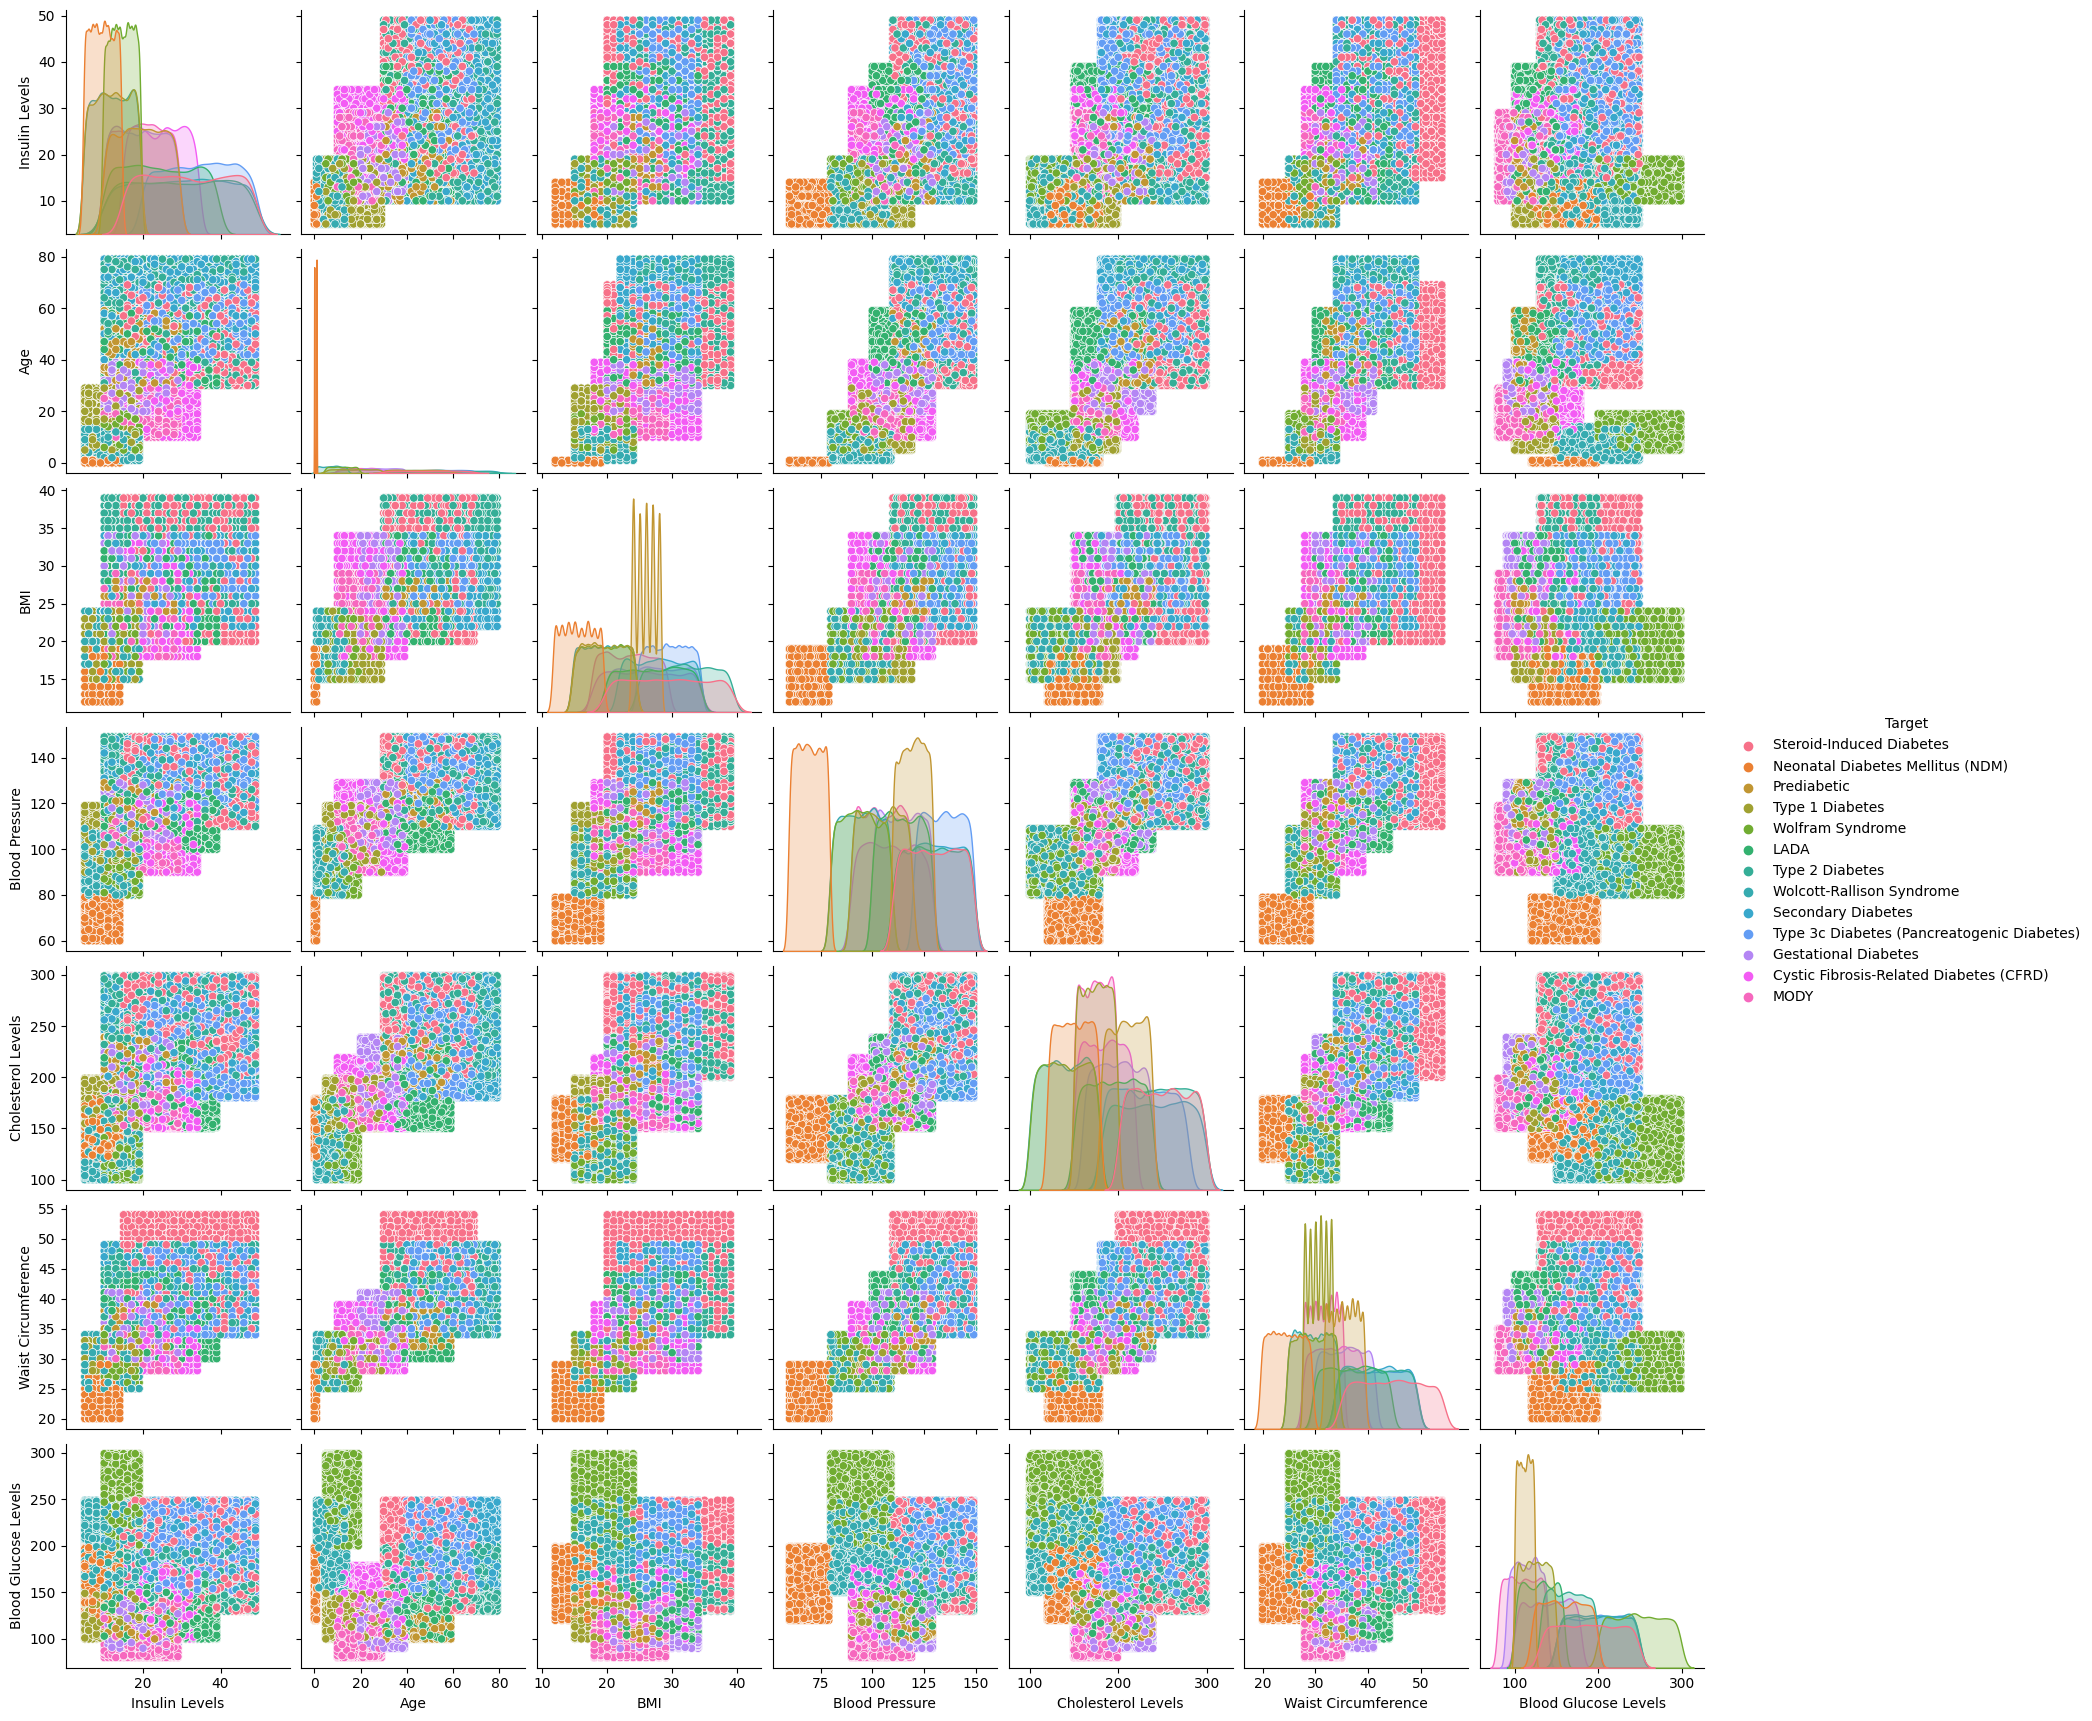

In [10]:
import seaborn as sns
sns.pairplot(df[["Insulin Levels","Age","BMI",
                 "Blood Pressure", "Cholesterol Levels",
                 "Waist Circumference", "Blood Glucose Levels" ,
                 "Target"]], hue = "Target")
plt.show()

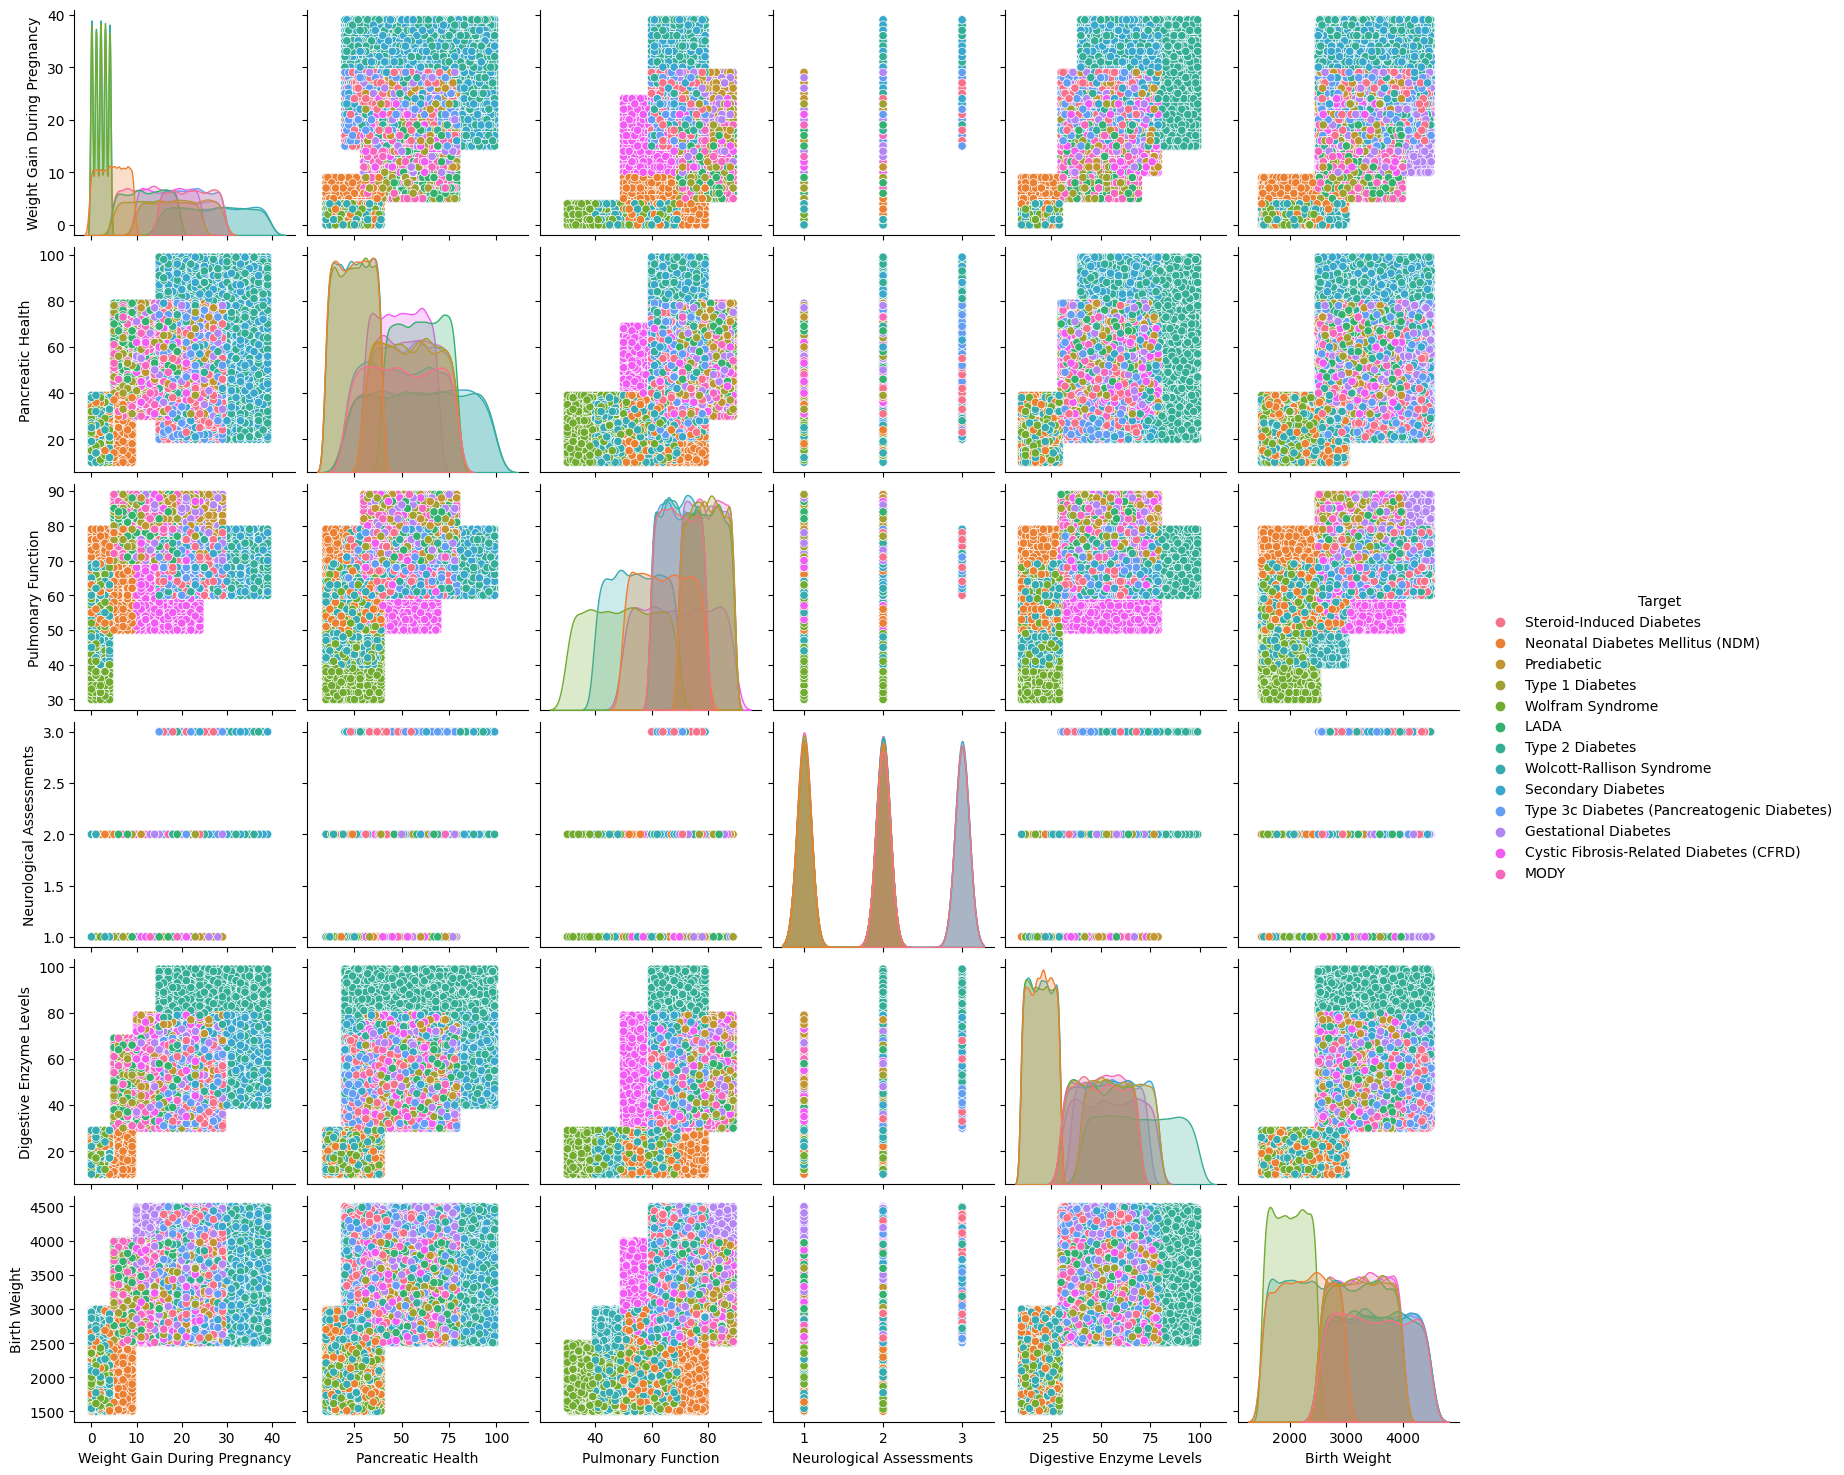

In [11]:
import seaborn as sns
sns.pairplot(df[["Weight Gain During Pregnancy","Pancreatic Health",
                 "Pulmonary Function","Neurological Assessments",
                 "Digestive Enzyme Levels","Birth Weight", "Target"]], hue = "Target")
plt.show()

In [14]:
num_features = list(df.select_dtypes(include = ["int64"]).columns)
cat_features = list(df.select_dtypes(include = ["object"]).columns)

In [15]:
# Corrolation Heat Maps

def plot_correlation_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize = (10,8))
    sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5) 
    plt.title("Correlation of Features")
    plt.show()

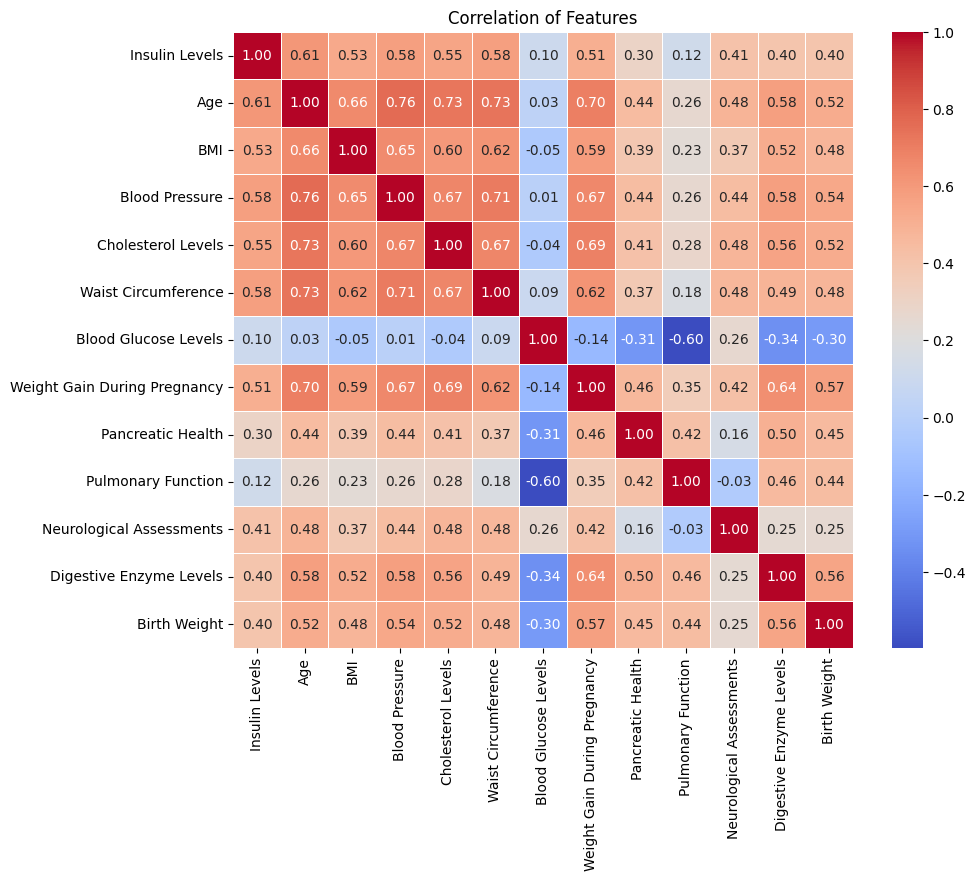

In [16]:
plot_correlation_heatmap(df[num_features])

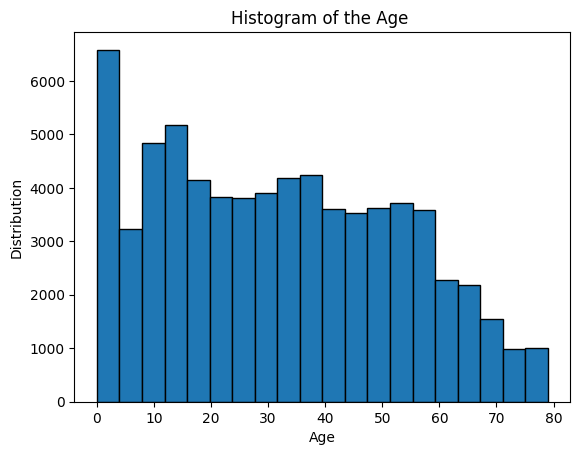

In [17]:
plt.hist(df["Age"], bins=20, edgecolor='black')
plt.title('Histogram of the Age ')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

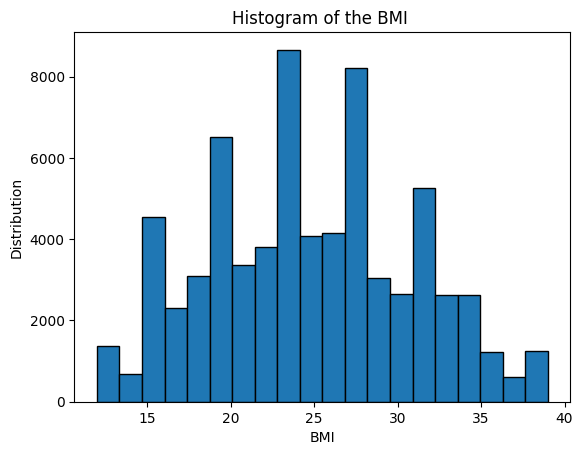

In [18]:
plt.hist(df["BMI"], bins=20, edgecolor='black')
plt.title('Histogram of the BMI ')
plt.xlabel('BMI')
plt.ylabel('Distribution')
plt.show()

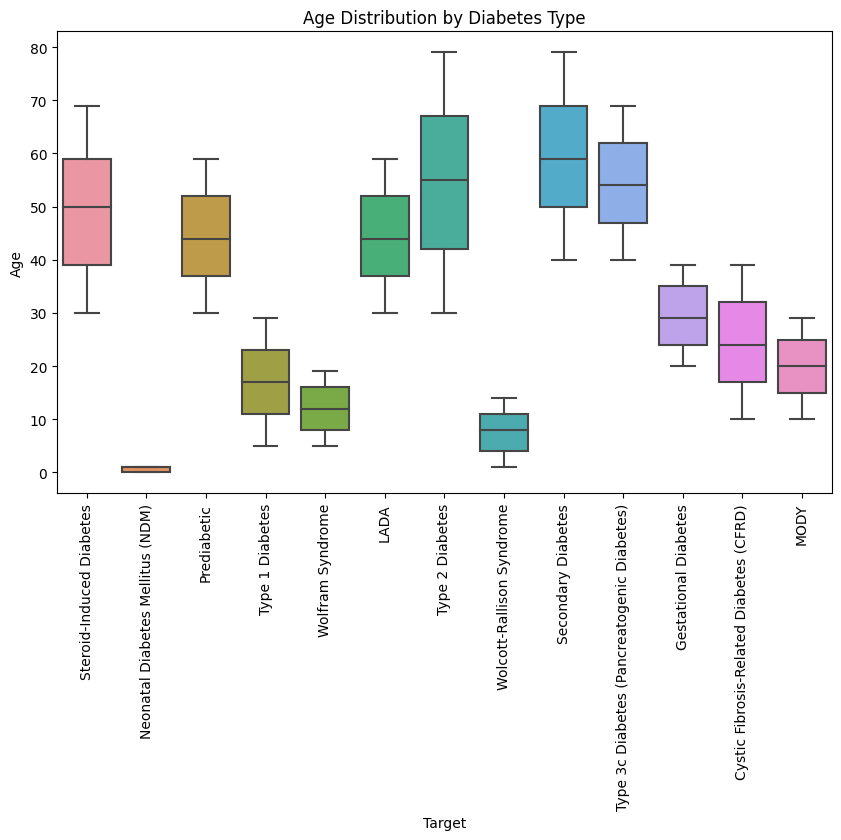

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.xticks(rotation=90)
plt.title('Age Distribution by Diabetes Type')
plt.show()

# Feature Selection

## Preprocessing

In [20]:
df[num_features] = df[num_features].astype("float64")

categories = cat_features
categories.remove("Target")

y = df["Target"]
X = df.drop("Target", axis = 1)

# One-hot encoding for categorical Variables
df_one_hot = pd.get_dummies(X, columns = categories, prefix = categories)

# Label encoding for target valuse
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder() 
y = lbe.fit_transform(y)

df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Insulin Levels                     70000 non-null  float64
 1   Age                                70000 non-null  float64
 2   BMI                                70000 non-null  float64
 3   Blood Pressure                     70000 non-null  float64
 4   Cholesterol Levels                 70000 non-null  float64
 5   Waist Circumference                70000 non-null  float64
 6   Blood Glucose Levels               70000 non-null  float64
 7   Weight Gain During Pregnancy       70000 non-null  float64
 8   Pancreatic Health                  70000 non-null  float64
 9   Pulmonary Function                 70000 non-null  float64
 10  Neurological Assessments           70000 non-null  float64
 11  Digestive Enzyme Levels            70000 non-null  flo

In [21]:
# Train, test dataset split

X_train, X_test, y_train, y_test = train_test_split(df_one_hot, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## Principal Component Analysis (PCR)

* PCR combines Principal Component Analysis (PCA) and regression, and while its primary goal is dimensionality reduction rather than feature selection, it can be indirectly used for selecting the most important features. PCA transforms the original features into a new set of orthogonal components (principal components) ranked by the amount of variance they capture. PCR selects a subset of these principal components and uses them for regression.
* PCR does not directly tell you which original features are important since principal components are linear combinations of all features. However, by examining the loadings (coefficients that relate the original features to the principal components), you can identify which features contribute most to the important components. 

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 11.26,  14.83,  18.36,  21.87,  25.38,  28.88,  32.36,  35.84,
        39.31,  42.77,  46.22,  49.66,  53.08,  56.48,  59.88,  63.27,
        66.64,  69.99,  72.61,  75.21,  77.8 ,  80.38,  82.94,  85.49,
        87.79,  90.08,  92.37,  93.42,  94.41,  95.26,  96.07,  96.81,
        97.52,  98.12,  98.66,  99.15,  99.62, 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  ])

In [23]:
X_reduced_test = pca.fit_transform(scale(X_test))

In [24]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)
lm = LinearRegression()
RMSE =  []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

RMSE

[3.700577013060444,
 3.227317053387708,
 3.117065442491447,
 3.1166812670845383,
 3.058099764310411,
 3.0420942639924924,
 3.041822083692242,
 3.0379836646249636,
 3.004441916293429,
 3.00340955781475,
 3.0032806006489787,
 2.975669218774912,
 2.8474812823821787,
 2.8380714524650985,
 2.837887656327449,
 2.8266409540985413,
 2.8091156661378696,
 2.8090997308191414,
 2.809119600877069,
 2.8081068205462034,
 2.8079234204479353,
 2.8079631401850187,
 2.8080244110921955,
 2.8073116577096586,
 2.807362388800388,
 2.80736961548727,
 2.8072516734608257,
 2.80533267317791,
 2.781538984977936,
 2.7513316848257103,
 2.747086930845001,
 2.723832122921722,
 2.7089424942988276,
 2.6691211153213983,
 2.6655958135345688,
 2.6654512486534663,
 2.645630391926836,
 2.64015196277349,
 2.640152925110791,
 2.6401507001785833,
 2.6401530311178565,
 2.640149232553302,
 2.6401513335921165,
 2.6401519295055818,
 2.6401503540552804,
 2.6401496763853207,
 2.640153172567629,
 2.640151335245427,
 2.640153555315696

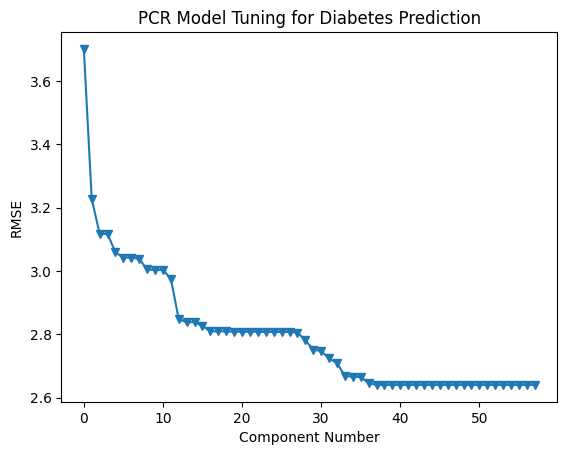

In [25]:
plt.plot(RMSE, '-v')
plt.xlabel('Component Number')
plt.ylabel('RMSE') # hata kareler ortalamsının kare kökü
plt.title('PCR Model Tuning for Diabetes Prediction');

* The figure represents the tuning process for a Principal Component Regression (PCR) model used for diabetes prediction. The x-axis shows the number of principal components, and the y-axis shows the Root Mean Square Error (RMSE), which measures the model's prediction error. The goal is to minimize the RMSE while balancing model complexity. 
* There is a significant reduction in RMSE as the number of components increases from 0 to around 10. This indicates that the first few principal components capture the majority of the variance in the data and significantly improve model performance. 
* The "elbow" of the graph, where the RMSE starts to stabilize (around 10–15 components), could indicate the optimal number of components to balance performance and complexity. 

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:38], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:38])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

2.6381314113640233


In [27]:
# prediction of test dataset
y_pred = pcr_model.predict(X_reduced_test[:,0:38])

#meansquared error for test dataset
print(np.sqrt(mean_squared_error(y_test, y_pred)))

4.466116965568966


## Random Forests (RF)

In [28]:
from sklearn.ensemble import RandomForestClassifier

# The parameters to be tuned
rf_params = {"max_depth":[2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

# Model tuning
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

print("The best parameters: " + str(rf_cv_model.best_params_))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
The best parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [46]:
# Fine-tuned model
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 8,
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8727142857142857

Text(0.5, 0, 'Variable importance Level')

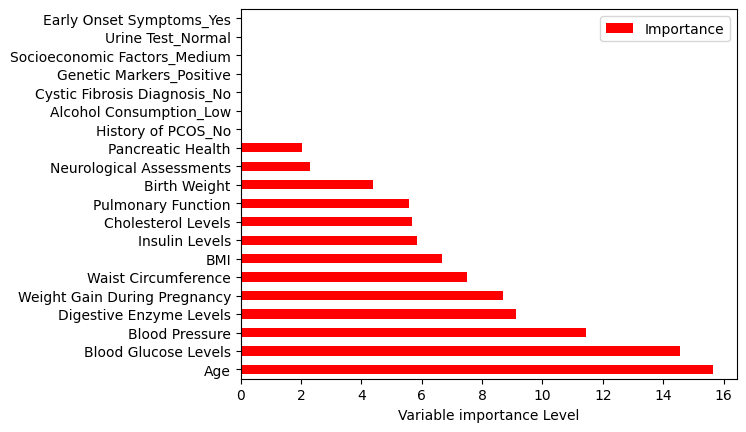

In [30]:
# Finding importance level of the variables
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = False).iloc[0:20].plot(kind ="barh", color = "r")

plt.xlabel("Variable importance Level")

* Since the effect of numerical variables on the outcome is much higher, only these variables will be used in the classification models.

In [31]:
important_features = Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = False)[0:13].index
important_features = list(important_features)

important_features

['Age',
 'Blood Glucose Levels',
 'Blood Pressure',
 'Digestive Enzyme Levels',
 'Weight Gain During Pregnancy',
 'Waist Circumference',
 'BMI',
 'Insulin Levels',
 'Cholesterol Levels',
 'Pulmonary Function',
 'Birth Weight',
 'Neurological Assessments',
 'Pancreatic Health']

# Machine Learning Algorithms for Classification

## Preproccessing

In [32]:
diabetes = pd.read_csv("diabetes_dataset00.csv")
df = diabetes.copy()
df.head()

Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...                  60   
2              High      Unhealthy  ...                  80   
3               Low      Unhealthy  ...                  89   
4              High        Healthy  ...                  41   

   Cystic Fibrosis Diagnosis  Steroid Use History  Genetic Testing  \
0                         No                   No         Positive   
1                        Yes                   No         Negative   
2                        Yes                   No         Negative   
3                        Yes                   No         Positive   
4                         No                   No         Positive   

  Neurological Assessments Liver Function Tests Digestive Enzyme Levels  \
0                        3               Normal                      56   
1                        1               Normal                      28   
2                        1             Abnormal                      55   
3                        2             Abnormal                      60   
4                        1               Normal                      24   

        Urine Test Birth Weight Early Onset Symptoms  
0  Ketones Present         2629                   No  
1  Glucose Present         1881                  Yes  
2  Ketones Present         3622                  Yes  
3  Ketones Present         3542                   No  
4  Protein Present         1770                   No  

[5 rows x 34 columns]

In [33]:
y = df["Target"]
X = df[num_features].astype("float64")

from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder() 
y = lbe.fit_transform(y)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Insulin Levels                70000 non-null  float64
 1   Age                           70000 non-null  float64
 2   BMI                           70000 non-null  float64
 3   Blood Pressure                70000 non-null  float64
 4   Cholesterol Levels            70000 non-null  float64
 5   Waist Circumference           70000 non-null  float64
 6   Blood Glucose Levels          70000 non-null  float64
 7   Weight Gain During Pregnancy  70000 non-null  float64
 8   Pancreatic Health             70000 non-null  float64
 9   Pulmonary Function            70000 non-null  float64
 10  Neurological Assessments      70000 non-null  float64
 11  Digestive Enzyme Levels       70000 non-null  float64
 12  Birth Weight                  70000 non-null  float64
dtypes

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_one_hot, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## Logistic Regression

In [35]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)

cross_val_score(loj_model, X_test, y_test, cv = 10).mean() # doğrulanmış ortalama hata

0.7057857142857142

## Naive Bayes(Gaussian)

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.8192857142857143

## K-Nearest Neighbor (KNN)

In [37]:
knn_params = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

print("The best skor:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best skor:0.6802857142857143
The best parameters: {'n_neighbors': 21}


In [38]:
# Fine-tuned model
knn = KNeighborsClassifier(21)
knn_tuned = knn.fit(X_train, y_train)

knn_tuned.score(X_test, y_test)

0.6757857142857143

## Classification and Regression Trees (CART)

In [39]:
from sklearn.tree import DecisionTreeClassifier

# the parameters to be tuned
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

print("The best parameters: " + str(cart_cv_model.best_params_))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
The best parameters: {'max_depth': 9, 'min_samples_split': 2}


In [47]:
# Fine-tuned model
cart = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7709285714285714

## Random Forests (RF)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# parameters to  be tuned
rf_params = {"max_depth":[2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

# Model tuning
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [42]:
print("The best parameters: " + str(rf_cv_model.best_params_))

The best parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 1000}


In [48]:
# Fine-tuned model
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 8,
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8717142857142857

## Comparing The Performans of Machine Learning Models

In [49]:
modeller = [knn_tuned,
            loj_model,
            nb_model,
            cart_tuned,
            rf_tuned]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ".")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier.
Accuracy: 67.5786%
----------------------------
LogisticRegression.
Accuracy: 70.6786%
----------------------------
GaussianNB.
Accuracy: 82.5071%
----------------------------
DecisionTreeClassifier.
Accuracy: 77.0929%
----------------------------
RandomForestClassifier.
Accuracy: 87.1714%


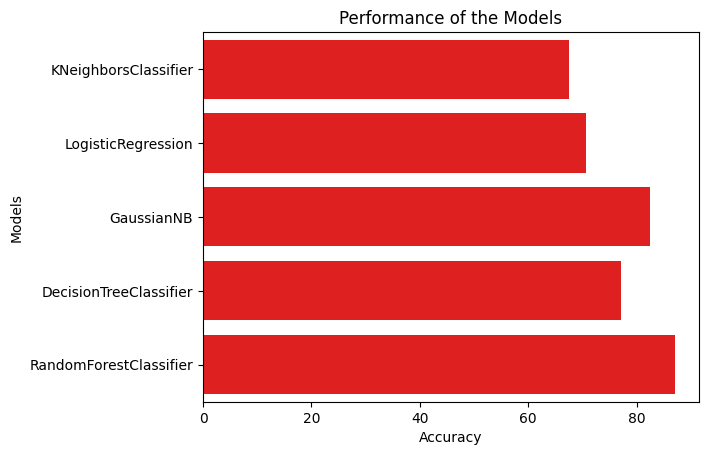

In [53]:
sonuc = []
sonuclar = pd.DataFrame(columns = ["Models", "Accuracy"])
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Models", "Accuracy"])
    sonuclar = sonuclar.append(sonuc)

sns.barplot(x = "Accuracy", y = "Models", data = sonuclar, color = "r")
plt.xlabel("Accuracy")
plt.title("Performance of the Models");